In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
fruits = pd.read_table('fruits.txt')

In [3]:
fruits.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

In [4]:
fruits.shape

(59, 7)

In [5]:
fruits.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

<Axes: xlabel='fruit_name'>

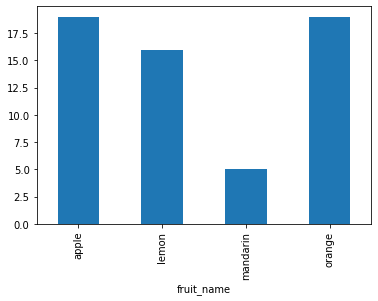

In [6]:
counts = _
counts.plot(kind='bar')

In [7]:
label_removed = fruits.drop('fruit_label', axis=1)

In [8]:
label_removed.head()

fruit_name fruit_subtype  mass  width  height  color_score
0      apple  granny_smith   192    8.4     7.3         0.55
1      apple  granny_smith   180    8.0     6.8         0.59
2      apple  granny_smith   176    7.4     7.2         0.60
3   mandarin      mandarin    86    6.2     4.7         0.80
4   mandarin      mandarin    84    6.0     4.6         0.79

mass              Axes(0.125,0.536818;0.352273x0.343182)
width          Axes(0.547727,0.536818;0.352273x0.343182)
height               Axes(0.125,0.125;0.352273x0.343182)
color_score       Axes(0.547727,0.125;0.352273x0.343182)
dtype: object

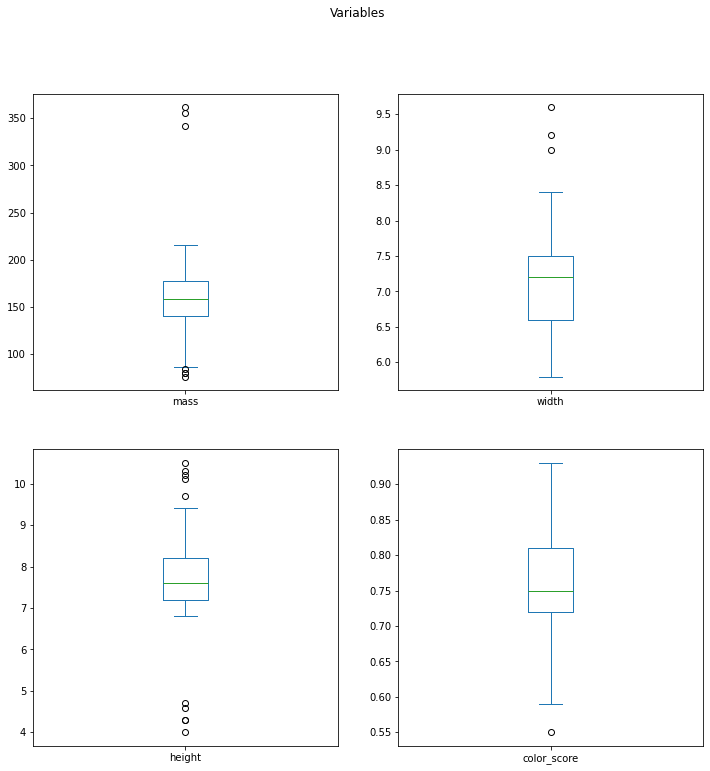

In [9]:
label_removed.plot(kind='box', subplots=True, layout=(2,2), title='Variables', figsize=(12, 12))

array([[<Axes: title={'center': 'mass'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'color_score'}>]], dtype=object)

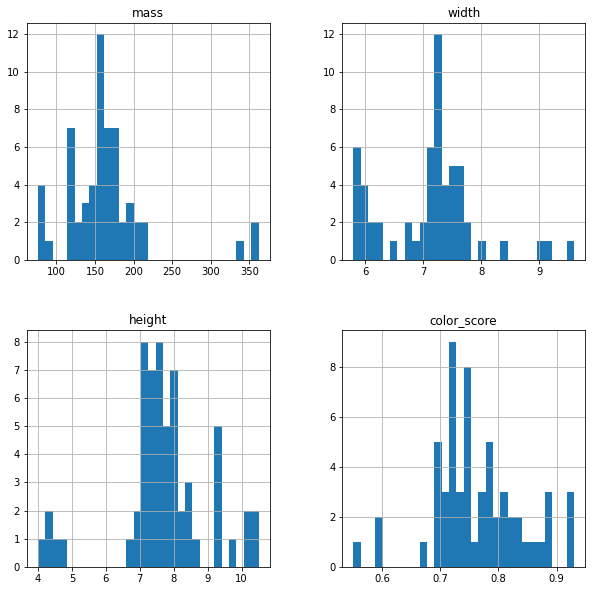

In [10]:
label_removed.hist(bins=30, figsize=(10, 10))

In [11]:
feature_names = ['mass', 'width', 'height', 'color_score']

In [12]:
X = fruits[feature_names]
y = fruits['fruit_label']

from matplotlib import cm

cmap = cm.get_cmap('gnuplot')

/var/folders/b3/cjvms6c10k77tgv6k_rw3jbh0000gn/T/ipykernel_73793/3949518286.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gnuplot')


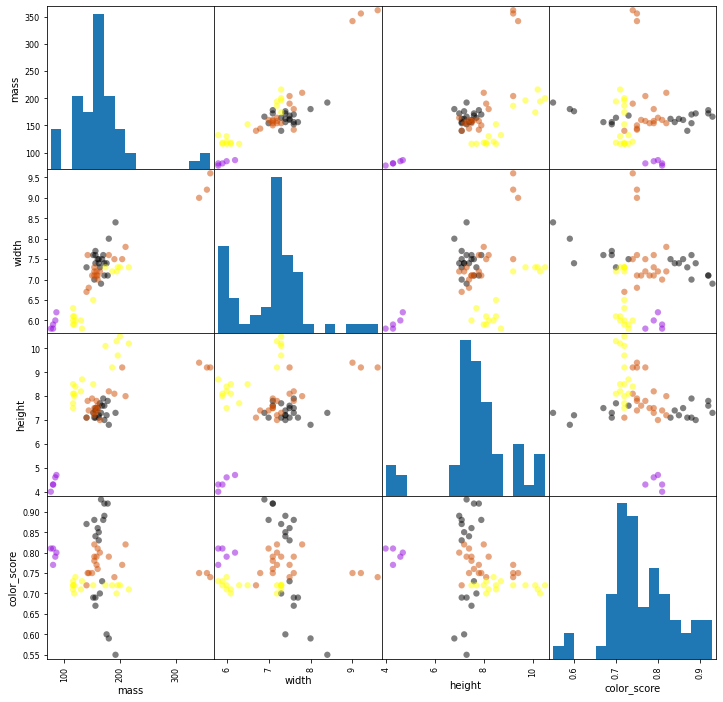

In [13]:
scatter = pd.plotting.scatter_matrix(X, c=y, marker='o', s=40, hist_kwds={'bins': 15}, cmap=cmap, figsize=(12,12))

In [14]:
X.head()

mass  width  height  color_score
0   192    8.4     7.3         0.55
1   180    8.0     6.8         0.59
2   176    7.4     7.2         0.60
3    86    6.2     4.7         0.80
4    84    6.0     4.6         0.79

In [15]:
X.describe()

mass      width     height  color_score
count   59.000000  59.000000  59.000000    59.000000
mean   163.118644   7.105085   7.693220     0.762881
std     55.018832   0.816938   1.361017     0.076857
min     76.000000   5.800000   4.000000     0.550000
25%    140.000000   6.600000   7.200000     0.720000
50%    158.000000   7.200000   7.600000     0.750000
75%    177.000000   7.500000   8.200000     0.810000
max    362.000000   9.600000  10.500000     0.930000

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)